<a href="https://colab.research.google.com/github/AngelaCorvino/BrainAge/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression models**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

Read the data set and add a feature "Site" which is the acquisition site


In [ ]:

dataset_file = 'https://raw.githubusercontent.com/AngelaCorvino/BrainAge/main/data/FS_features_ABIDE_males.csv'
df = pd.read_csv(dataset_file,sep=';')
df.FILE_ID
df.FILE_ID[0].split('_')[0]
df['Site'] = df.FILE_ID.apply(lambda x: x.split('_')[0])

Divede the data set in ASD and TD and check their shape


In [ ]:
df_ASD=df.loc[df.DX_GROUP==1]
df_TD=df.loc[df.DX_GROUP==-1]
df_ASD.size
df_TD.shape

(464, 425)

Devide the TD data set in train and test

In [ ]:
train_set, test_set = train_test_split(df_TD, test_size = 0.3)

# Linear Regression
LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

# One feauture
We can hypothesize that there is a linear dependence, for example, of cortical thickness on the subject's age. The question is: Is it possible to predict a person's age from his cortical thickness?

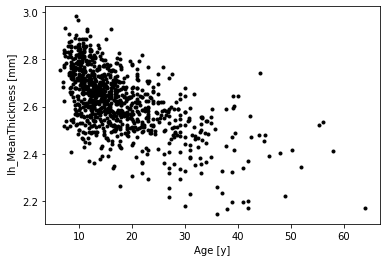

In [ ]:
plt.scatter(df.AGE_AT_SCAN, df.lh_MeanThickness, color='black', marker='.')
plt.xlabel('Age [y]')
plt.ylabel(' lh_MeanThickness [mm]')
plt.show()


In [ ]:
model=LinearRegression()
x_train =pd.DataFrame(data=train_set, columns=['lh_MeanThickness'])
x_test =pd.DataFrame(data=test_set, columns=['lh_MeanThickness'])
y_train = train_set['AGE_AT_SCAN']
y_test= test_set['AGE_AT_SCAN']
model=LinearRegression() #here we can add hyperparameters like angular coefficient
model.fit(x_train, y_train)
predict_y = model.predict(x_test)
print(mean_squared_error(y_test, predict_y, squared=False))
print(mean_absolute_error(y_test, predict_y))

0.31488917550614526 [-35.0778818] 109.37266566501944
6.510747956630763
5.160854700480262


.score returns the coefficient of determination R^2 of the prediction. The best possible score is 1.0

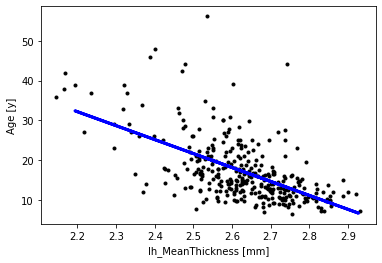

In [ ]:
plt.scatter(x_train, y_train,  color='black', marker='.')
plt.plot(x_test, predict_y, color='blue', linewidth=3)
plt.xlabel(f'{x_test.columns[0]} [mm]')
plt.ylabel('Age [y]')
plt.show()

# Two feautures 

[-3.75349168e+01  9.01578240e-06] 109.0968491658771
0.31548507517790725


Text(0.5, 0, 'y_train')

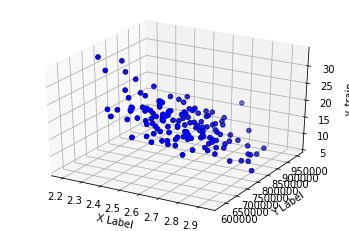

In [ ]:
features= [ 'lh_MeanThickness','TotalGrayVol',
       ]
x_train = train_set[features]
x_test = test_set[features]
y_train = train_set['AGE_AT_SCAN']
y_test = test_set['AGE_AT_SCAN']
model=LinearRegression() #here we can add hyperparameters like angular coefficient
model.fit(x_train, y_train)
predict_y = model.predict(x_test)
print(model.coef_,model.intercept_)
loss = model.score(x_test, y_test)
print(loss )

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    
#ax.scatter(x_test.lh_MeanThickness, x_test.rh_MeanThickness, Y_, color='black')
#ax.scatter(x_test_M.lh_MeanThickness, x_test.rh_MeanThickness, Y_fit_M, color='blue')

ax.scatter(x_test.lh_MeanThickness, x_test.TotalGrayVol, predict_y, color='black')
ax.scatter(x_test.lh_MeanThickness, x_test.TotalGrayVol, predict_y, color='blue')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('y_train')



In [ ]:
# Import dependencies

import plotly
import plotly.graph_objs as go

# Configure the traces for data points and fit.
trace_data = go.Scatter3d(
    x=x_test.lh_MeanThickness,
    y=x_test.TotalGrayVol,
#    y=X_feat_M.TotalGrayVol, # you can try with different features, e.g. TotalGrayVol
    z=y_test,
    mode='markers',
    marker={
        'size': 3,
        'opacity': 0.8,
    },
    name='Data points'
)

trace_fit = go.Scatter3d(
    x=x_test.lh_MeanThickness,
    #y=X_feat_M.rh_MeanThickness,
    y=x_test.TotalGrayVol,
    z=predict_y,
    mode='markers',
    marker={
        'size': 3,
        'opacity': 0.8,
    },
        name='Fitted data'
)
# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    scene= {
    #"xaxis":{'title':'lh_MeanThickness'},
    "yaxis":{'title':'rh_MeanThickness'},
    "yaxis":{'title':'TotalGrayVol'},
    "zaxis":{'title':'Age'}
    }
)

data = [trace_data, trace_fit]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plot_figure.show()

# **Multiple feautures**

In [ ]:
features = [ 'lhCortexVol', 'rhCortexVol',
       'lhCerebralWhiteMatterVol', 'rhCerebralWhiteMatterVol', 'TotalGrayVol', 'CSF_Volume_mm3',
       ]

In [ ]:
x_train = train_set[features]
x_test = test_set[features]
y_train = train_set['AGE_AT_SCAN']
y_test = test_set['AGE_AT_SCAN']

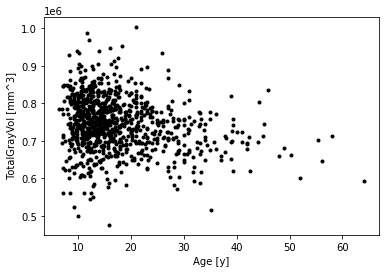

In [ ]:
plt.scatter(df.AGE_AT_SCAN, df.TotalGrayVol, color='black', marker='.')
plt.xlabel('Age [y]')
plt.ylabel(' TotalGrayVol [mm^3]')
plt.show()


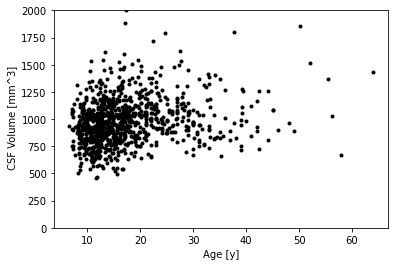

In [ ]:
plt.scatter(df.AGE_AT_SCAN, df.CSF_Volume_mm3, color='black', marker='.')
plt.xlabel('Age [y]')
plt.ylabel(' CSF Volume [mm^3]')
plt.ylim([0,2000])
plt.show()

# Linear Regression

In [ ]:
model=LinearRegression() #here we can add hyperparameters like angular coefficient
model.fit(x_train, y_train)
predict_y = model.predict(x_test)
print(mean_squared_error(y_test, predict_y, squared=False))
print(mean_absolute_error(y_test, predict_y))

5.683739740098508
4.442972290408446


# Gaussian Regression

In [ ]:
model=GaussianProcessRegressor()
model.fit(x_train, y_train)
predict_y = model.predict(x_test)
print(mean_squared_error(y_test, predict_y, squared=False))
print(mean_absolute_error(y_test, predict_y))

19.44836499302705
17.786678571428574


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
predict_y = model.predict(x_test)
print(mean_squared_error(y_test, predict_y, squared=False))
print(mean_absolute_error(y_test, predict_y))

5.920459896742907
4.431161128571428


# Polynomial regression 

In [ ]:
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                      ('linear', LinearRegression(fit_intercept=False))])

model.fit(x_train, y_train)
predict_y = model.predict(x_test)
print(mean_squared_error(y_test, predict_y, squared=False))
print(mean_absolute_error(y_test, predict_y))

20.605804586565604
9.946143774362438


# Pipeline
All estimators in a pipeline, except the last one, must be transformers (i.e. must have a transform method). The last estimator may be any type (transformer, classifier, etc.).

In [ ]:
from sklearn.pipeline import Pipeline
model = Pipeline([('scaler', StandardScaler()),
                      ('poly', PolynomialFeatures(degree=2)),
                      ('linear', LinearRegression(fit_intercept=False))])

model.fit(x_train, y_train)
predict_y = model.predict(x_test)
print(mean_squared_error(y_test, predict_y, squared=False))
print(mean_absolute_error(y_test, predict_y))

5.933674081517083
4.507922463350655


In [ ]:
from scipy.stats import pearsonr
plt.figure(figsize=(10,10))
p_value = pearsonr(test_array,predict_array)
rmse = np.sqrt(mean_squared_error(test_array, predict_array))
r2 = r2_score(test_array, predict_array)
plt.scatter(test_array,predict_array,c='y')
plt.xlabel('Ground truth Age(years)')
plt.ylabel('Predicted Age(years)')
plt.title('Ground-truth Age versus Predict Age using \n \
            Gaussian Regression ')
plt.plot(np.linspace(15,80,100),np.linspace(15,80,100), c='r', label='Expected prediction line')
offset = 20
plt.text(10, 80+offset, f'Mean Absolute Error={round(loss_array.mean(),3)}',fontsize=14)
plt.text(10, 75+offset, f'Pearson correlation coefficient:{round(p_value[0],3)}',fontsize=14)
plt.text(10, 70+offset, f'R Squared:{round(r2,3)}',fontsize=14)
plt.text(10, 65+offset, f'RMSE:{round(rmse,3)}',fontsize=14)

plt.legend()
plt.show()

NameError: ignored

<Figure size 720x720 with 0 Axes>

# ** Feautures according to correlation to AGE AT SCAN **


In [ ]:
agecorr_TD=df_TD.corr()['AGE_AT_SCAN'] #we acces to the column relative to age
listoffeatures=agecorr_TD[np.abs(agecorr_TD)>0.5].keys()
listoffeatures = listoffeatures.drop('AGE_AT_SCAN')

x_train = train_set[listoffeatures]
x_test = test_set[listoffeatures]
y_train = train_set['AGE_AT_SCAN']
y_test = test_set['AGE_AT_SCAN']

Linear Regression


In [ ]:

model=LinearRegression() #here we can add hyperparameters like angular coefficient
model.fit(x_train, y_train)
predict_y = model.predict(x_test)
print(mean_squared_error(y_test, predict_y, squared=False))
print(mean_absolute_error(y_test, predict_y))

5.683739740098508
4.442972290408446


# **K-Fold**
The k-fold cross-validation procedure is a standard method for estimating the performance of a machine learning algorithm on a dataset.
The k-fold cross-validation procedure divides a limited dataset into k non-overlapping folds. Each of the k folds is given an opportunity to be used as a held-back test set, whilst all other folds collectively are used as a training dataset.
The k-fold cross-validation procedure can be implemented easily using the scikit-learn machine learning library.
We will evaluate a Linear model and use the KFold class to perform the cross-validation, configured to shuffle the dataset and set k=10, a popular default.